<a href="https://colab.research.google.com/github/datascience-vivek/EDA-Capstone-Project-on-Hotel-Bookings/blob/main/EDA_Capstone_Project_on_Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Reading and understanding data:**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path where data is kept:
path = '/content/drive/My Drive/Datasets/'

In [ ]:
#Reading the data:
df = pd.read_csv(path + 'Hotel_Bookings.csv')

In [ ]:
#Inspect datatypes and null values in the dataset:
df.info()

## **List of Column Names:**

In [ ]:
#List of Columns:
list(df.columns)

## **Find Empty Cells in Dataset:**

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## **Remove Company and Agent Column in from this Dataset:**


*   Comapany and Agent column has much missing values, so removing them from the dataset makes no issue.



In [ ]:
df = df.drop(['company','agent'], axis=1)

In [ ]:
df.shape

(119390, 30)

# **First Five rows of the Dataset.:**





In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Find Missing Values.:**

In [ ]:
df.isnull().sum()

In [ ]:
list(df.columns)

## **Remove Children and Country Missing Cells:**

In [ ]:
df= df.dropna(axis=0)

In [ ]:
# Finding Null Values:
df.isnull().sum()

In [ ]:
#Statistical measure of numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## **Merging Both Children and Babies columns in Child Column:**

In [ ]:
df['child'] = df.children + df.babies

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,child
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


## **Merging Childs Column in Adults Column to Complete Family Member Data:**

In [ ]:
df['Family Member'] = df.child + df.adults

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,child,Family Member
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


In [ ]:
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

<function matplotlib.pyplot.show>

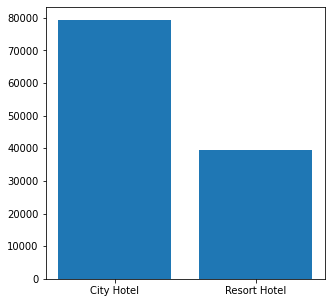

In [ ]:
plt.figure(figsize =(5,5))
plt.bar(list(df['hotel'].value_counts().keys()),list(df['hotel'].value_counts()))
plt.show

### As show in the above bar plot. Maximum Bookings are in the City Hotel as compared to Resort hotel.

# **Mean value for Family Members:**

In [ ]:
df['Family Member'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.947467,0.636438,0.0,2.0,2.0,2.0,12.0
Resort Hotel,39596.0,2.016769,0.866268,0.0,2.0,2.0,2.0,55.0


# **Mean value for child:**

## **Mean values for Total Family Member and children are higher. This means that resort hotels are better choice for large families.**

In [ ]:
df['child'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.096341,0.383615,0.0,0.0,0.0,0.0,10.0
Resort Hotel,39596.0,0.143828,0.465121,0.0,0.0,0.0,0.0,10.0


## **Overview of Cancelled Bookings:**

In [ ]:
df['is_canceled'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


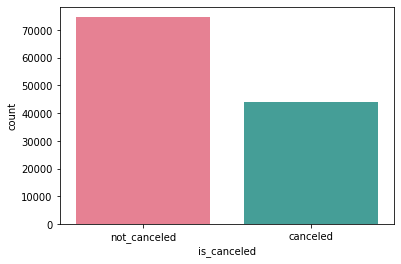

In [ ]:
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_df = df['is_canceled']
sns.countplot(canceled_df,palette='husl')

## As shown Below Majority of the bookings are not cancelled.

## Now, We check which hotel have maximum cancellation bookings:

Text(0.5, 1.0, 'Cancellation Rate in City and Resort hotel')

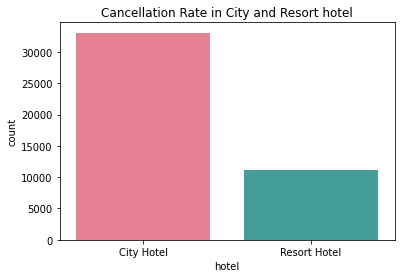

In [ ]:
list1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[list1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count',palette='husl').set_title('Cancellation Rate in City and Resort hotel')

### Bar Plot shows us City Hotel have much less canceled bookings as compared to Resort Hotel.

## **Now we find which year got Maximum bookings in both hotels:**

In [ ]:
df['arrival_date_year'].value_counts()

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

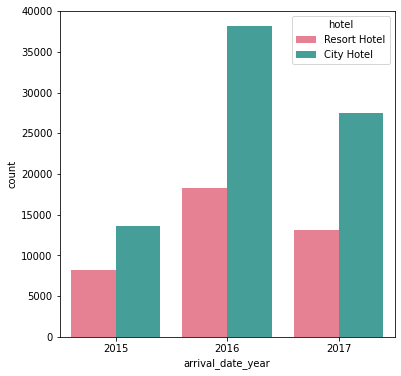

In [ ]:
plt.figure(figsize =(6,6))
list2 = ['hotel', 'arrival_date_year']
period_arrival = df[list2]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel',palette='husl')

## **Convert Arrival Date to Datetime:**

In [ ]:
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')

In [ ]:
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

In [ ]:
import datetime as dt

confirmed_bookings = df[df.is_canceled =='0']

confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

1      5874
2      8012
3      9739
4     11045
5     11779
6     10927
7     12628
8     13852
9     10467
10    11095
11     6752
12     6728
Name: arrival_date_month, dtype: int64

## **Now  we check the Arrival Persons Date by Months:**




In [ ]:
df.groupby(['hotel', 'arrival_date_month']).size().unstack(fill_value=0)

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
hotel,,,,,,,,,,,,
City Hotel,7476,8979,4129,4965,3736,8088,7894,6458,8232,4354,7591,7400
Resort Hotel,3569,4873,2599,3047,2138,4540,3033,3281,3547,2398,3504,3067


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


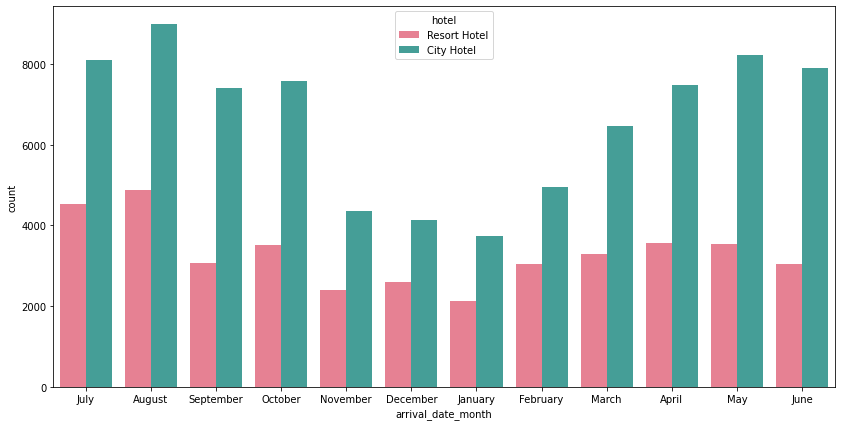

In [ ]:
plt.figure(figsize=(14,7))

sns.countplot( df['arrival_date_month'],hue= "hotel", palette='husl', data = df)
plt.show()

## Below Graph shows us that maximum persons came on April-October Months and Lower Bookings in the month of November to January.

# **Now we check majority of the stay on weekend or week nights:**

 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of stays on week nights')

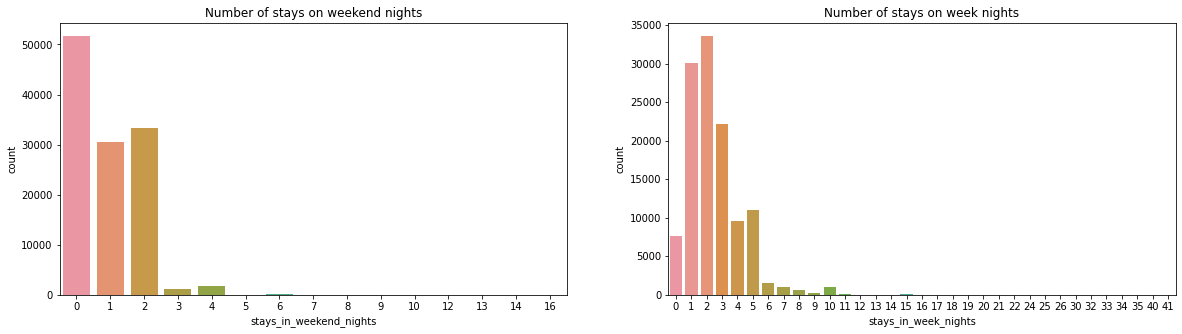

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot('stays_in_weekend_nights', data = df).set_title('Number of stays on weekend nights')
plt.subplot(1,2,2)
sns.countplot('stays_in_week_nights', data = df).set_title('Number of stays on week nights')

### In below graphs, We check majority of the stays are over the weekday's nights.

# **Q1- When the best time of Year to book a Hotel Room is...?**



In [ ]:
df['adr_per_person'] = df['adr']/df['Family Member'] 


In [ ]:
df= df.dropna(axis=0)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df['is_canceled'].replace(('not_canceled', 'canceled'), (1, 0), inplace=True)

In [ ]:
df['is_canceled'].value_counts()


1    74621
0    44138
Name: is_canceled, dtype: int64

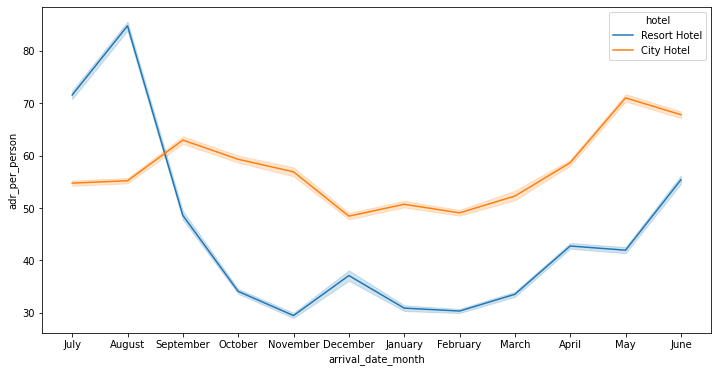

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr_per_person', hue='hotel', data= df)
plt.show()

## So, Below Graph Shows us November- January, there average daily rate will be less and the customers are less too.

# **Q2. When hotels was likely to recieve high number of special request...?**








In [ ]:
df['total_of_special_requests'].value_counts()

0    69900
1    33085
2    12913
3     2484
4      339
5       38
Name: total_of_special_requests, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


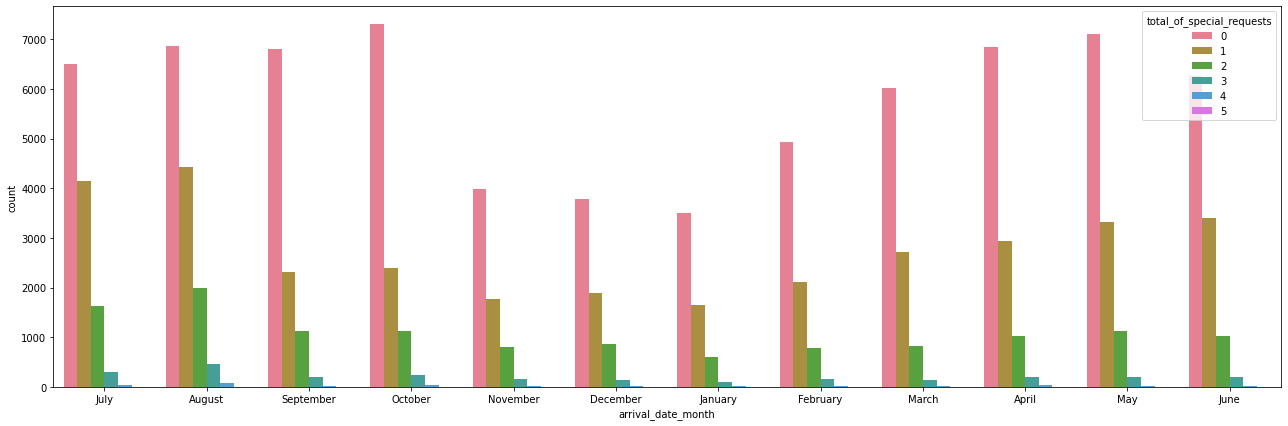

In [46]:
plt.figure(figsize=(22,7))

sns.countplot( df['arrival_date_month'],hue= "total_of_special_requests", palette='husl', data = df)
plt.show()

## In below graphs shows maximum number of requests comes on June to August period.

# **Summary:**


*   In this dataset, We see maximum number of bookings were done on City Resort as compared to resort Hotels.
*   Here, We see Maximum Number of bookings were made on April-October Months.
*   Another thing, We see here maximum number of people stays on week nights.

*   Average Daily Rate Person, are cheap in resort hotel as compared to city hotels in the month of November to January.





